# Optimizitation Project - Index Tracking & Enhanced Indexation

### Package and Data loading

In [58]:
pip install scikit-learn

2996.97s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import pandas as pd
import yfinance as yf
from typing import Dict, List, Optional
import matplotlib.pyplot as plt
import seaborn as sns


We selescted the CAC 40 as the reference index, the index contains the 40 largest comapanies on teh Paris stock exchange based on their market capitalisation.

In [14]:
INDEX_CONSTITUENTS = {
    'CAC40': {
        'ticker': '^FCHI',
        'constituents': [
            'AIR.PA', 'AI.PA', 'MT.AS', 'CS.PA', 'BNP.PA', 'EN.PA', 
            'CAP.PA', 'CA.PA', 'ACA.PA', 'BN.PA', 'DSY.PA', 'ENGI.PA',
            'EL.PA', 'ERF.PA', 'RMS.PA', 'KER.PA', 'LR.PA', 'OR.PA',
            'MC.PA', 'ML.PA', 'ORA.PA', 'RI.PA', 'PUB.PA', 'RNO.PA',
            'SAF.PA', 'SGO.PA', 'SAN.PA', 'SU.PA', 'GLE.PA', 'STLAP.PA',
            'STMPA.PA', 'TEP.PA', 'HO.PA', 'FP.PA', 'URW.AS', 'VIE.PA',
            'DG.PA', 'VIV.PA', 'WLN.PA', 'ALO.PA'
        ]
    }
}

The function below uses yahoo finance native python package to load daily financial data about the index and its constituents, such as the opening and closing price, the volume of transaction, the high and low.

In [15]:
def get_index_data(index_name: str,
                   period: str = '1y',
                   constituents: Optional[List[str]] = None) -> pd.DataFrame:
    """
    Fetch daily OHLCV data for an index and its constituents, and return a single DataFrame:
    columns = ['name', 'date', 'open', 'high', 'low', 'close', 'volume']
    """
    index_name = index_name.upper()

    if index_name not in INDEX_CONSTITUENTS:
        raise ValueError(f"Index '{index_name}' not supported. "
                         f"Available: {list(INDEX_CONSTITUENTS.keys())}")

    index_ticker = INDEX_CONSTITUENTS[index_name]['ticker']
    if constituents is None:
        constituents = INDEX_CONSTITUENTS[index_name]['constituents']

    all_rows = []

    def fetch_and_append(ticker, label):
        try:
            df = yf.Ticker(ticker).history(period=period)[['Open','High','Low','Close','Volume']]
            df = df.reset_index().rename(columns=str.lower)
            df['name'] = label
            all_rows.append(df[['name','date','open','high','low','close','volume']])
            print(f"✓ {label}")
        except Exception as e:
            print(f"✗ {label} - {e}")

    # Index itself
    print(f"Fetching index: {index_name}")
    fetch_and_append(index_ticker, index_name)

    # Constituents
    print(f"Fetching {len(constituents)} constituents...")
    for t in constituents:
        fetch_and_append(t, t)

    # Combine all
    big_df = pd.concat(all_rows, ignore_index=True)
    print(f"\nFinal dataset: {big_df['name'].nunique()} assets, {len(big_df):,} rows")

    return big_df


In [40]:
value_df = get_index_data('CAC40', period='1y')

Fetching index: CAC40
✓ CAC40
Fetching 40 constituents...
✓ AIR.PA
✓ AI.PA
✓ MT.AS
✓ CS.PA
✓ BNP.PA
✓ EN.PA
✓ CAP.PA
✓ CA.PA
✓ ACA.PA
✓ BN.PA
✓ DSY.PA
✓ ENGI.PA
✓ EL.PA
✓ ERF.PA
✓ RMS.PA
✓ KER.PA
✓ LR.PA
✓ OR.PA
✓ MC.PA
✓ ML.PA
✓ ORA.PA
✓ RI.PA
✓ PUB.PA
✓ RNO.PA
✓ SAF.PA
✓ SGO.PA
✓ SAN.PA
✓ SU.PA
✓ GLE.PA
✓ STLAP.PA
✓ STMPA.PA
✓ TEP.PA
✓ HO.PA


$FP.PA: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")


✓ FP.PA


$URW.AS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")


✓ URW.AS
✓ VIE.PA
✓ DG.PA
✓ VIV.PA
✓ WLN.PA
✓ ALO.PA

Final dataset: 39 assets, 9,984 rows


In [ ]:
# We add a column daily return calcualting the difference in % between the closing price of the day d and the closing price at d-1

value_df.sort_values(['name', 'date'])
value_df['daily_return_pct'] = value_df.groupby('name')['close'].pct_change() * 100
value_df


,name,date,open,high,low,close,volume,daily_return_pct
0,CAC40,2024-10-09 00:00:00+02:00,7527.029785,7567.580078,7504.629883,7560.089844,50003800.0,NaN
1,CAC40,2024-10-10 00:00:00+02:00,7543.399902,7563.359863,7515.899902,7541.589844,47654900.0,-0.244706
2,CAC40,2024-10-11 00:00:00+02:00,7530.879883,7587.520020,7504.040039,7577.890137,52952500.0,0.481335
3,CAC40,2024-10-14 00:00:00+02:00,7583.479980,7613.149902,7544.540039,7602.060059,43689100.0,0.318953
4,CAC40,2024-10-15 00:00:00+02:00,7595.060059,7601.529785,7511.240234,7521.970215,73146200.0,-1.053528
...,...,...,...,...,...,...,...,...
9979,ALO.PA,2025-10-03 00:00:00+02:00,22.750000,23.160000,21.930000,22.389999,1629798.0,-0.621399
9980,ALO.PA,2025-10-06 00:00:00+02:00,22.309999,22.370001,21.469999,22.350000,1811806.0,-0.178647
9981,ALO.PA,2025-10-07 00:00:00+02:00,22.330000,22.940001,22.290001,22.480000,700551.0,0.581652
9982,ALO.PA,2025-10-08 00:00:00+02:00,22.320000,23.020000,22.290001,22.700001,1030198.0,0.978653


### Exploratory Data Analysis (EDA)

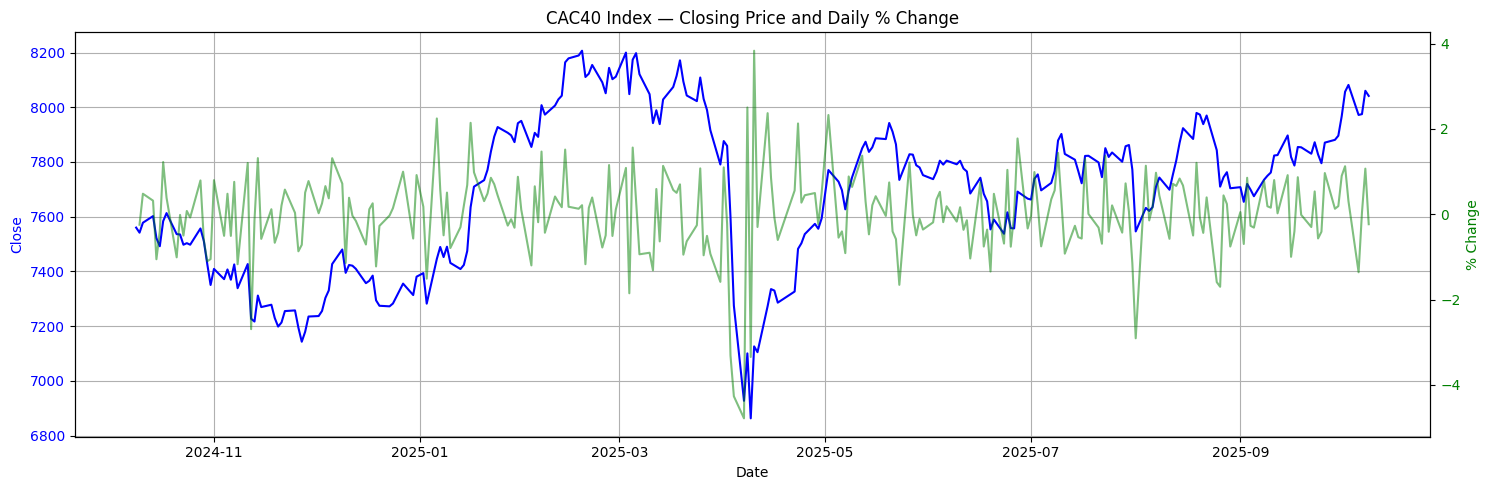

In [43]:
index_df = value_df[value_df['name'] == 'CAC40'].copy()
index_df['pct_change'] = index_df['close'].pct_change() * 100

fig, ax1 = plt.subplots(figsize=(15,5))

# Plot close price on left y-axis
ax1.plot(index_df['date'], index_df['close'], color='b', label='Close Price')
ax1.set_xlabel("Date")
ax1.set_ylabel("Close", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)

# Plot daily % change on right y-axis
ax2 = ax1.twinx()
ax2.plot(index_df['date'], index_df['pct_change'], color='g', label='Daily % Change', alpha=0.5)
ax2.set_ylabel('% Change', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title("CAC40 Index — Closing Price and Daily % Change")
fig.tight_layout()
plt.show()


#### Correlation Matrix

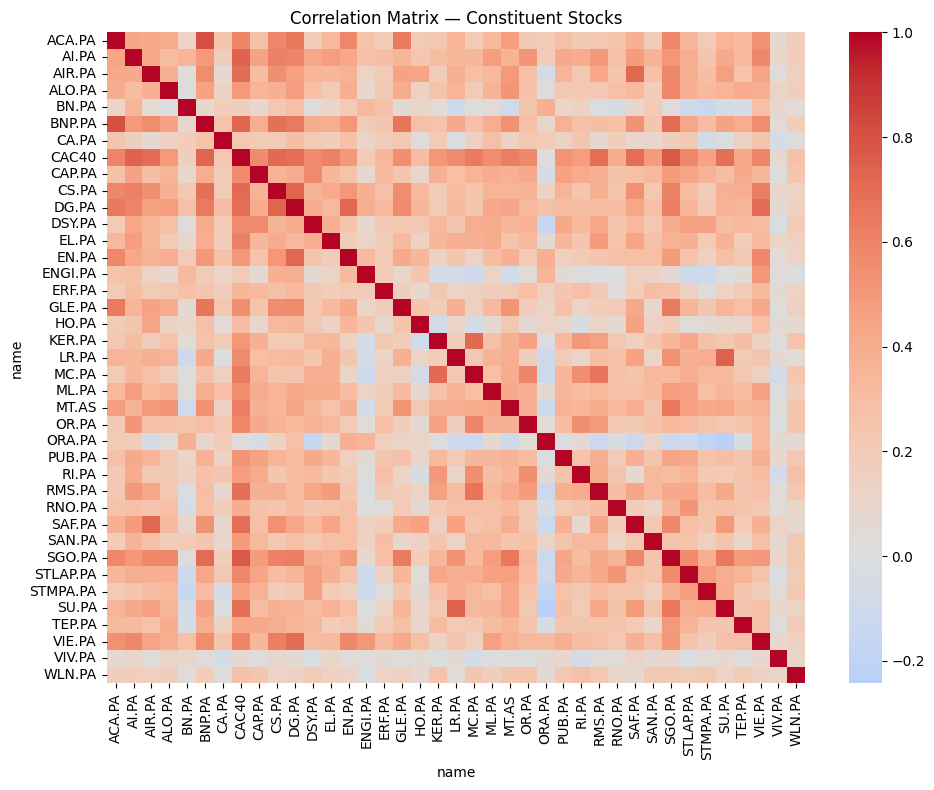

In [48]:
pivot_close = value_df.pivot(index='date', columns='name', values='daily_return_pct')

# Drop the index column (keep only stocks)
# pivot_stocks = pivot_close.drop(columns=['CAC40'], errors='ignore')

# Compute correlations (daily closes)
corr = pivot_close.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Matrix — Constituent Stocks")
plt.tight_layout()
plt.show()

### R² Score (Coefficient of Determination)

The **R² score** measures how well a stock’s returns can be explained by the index returns in a linear regression. In index tracking, it quantifies how closely a stock tracks the index.


Let $(y_i)$ be the actual stock returns and $(\hat{y}\_i)$ the predicted values from a linear regression on the index returns.

The coefficient of determination is

$$
R^2 \;=\; 1 \;-\; \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
Where:

- $\mathrm{RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2$ — **Residual Sum of Squares** (unexplained variance)  
- $\mathrm{TSS} = \sum_{i=1}^n (y_i - \bar{y})^2$ — **Total Sum of Squares** (total variance)  
- $\bar{y}$ — mean of the actual values $(y_i)$

##### Interpretation

- \($R^2$ = 1\): Stock returns **perfectly track** index returns (all variation explained).  
- \($R^2$ = 0\): Stock returns are **unrelated** to index returns (no variation explained).  
- Higher $(R^2)$ → Better tracking.




In [52]:
returns = value_df.pivot(index='date', columns='name', values='close').pct_change().dropna()
index_name = 'CAC40'  # Replace as needed
index_returns = returns[index_name]
stock_names = [col for col in returns.columns if col != index_name]

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [67]:
r2_results = []
for stock in stock_names:
    X = index_returns.values.reshape(-1, 1)
    y = returns[stock].values
    reg = LinearRegression().fit(X, y)
    r2 = r2_score(y, reg.predict(X))
    r2_results.append({'stock': stock, 'r2': r2})

r2_df = pd.DataFrame(r2_results)
r2_df = r2_df.sort_values('r2', ascending=False)  # Highest R² at the top
print(r2_df.head(10))  # Top 10 stocks by R²

     stock        r2
30  SGO.PA  0.597753
1    AI.PA  0.543743
5   BNP.PA  0.529242
8    CS.PA  0.514683
2   AIR.PA  0.495307
28  SAF.PA  0.475926
26  RMS.PA  0.470525
9    DG.PA  0.470095
33   SU.PA  0.465536
19   MC.PA  0.399597


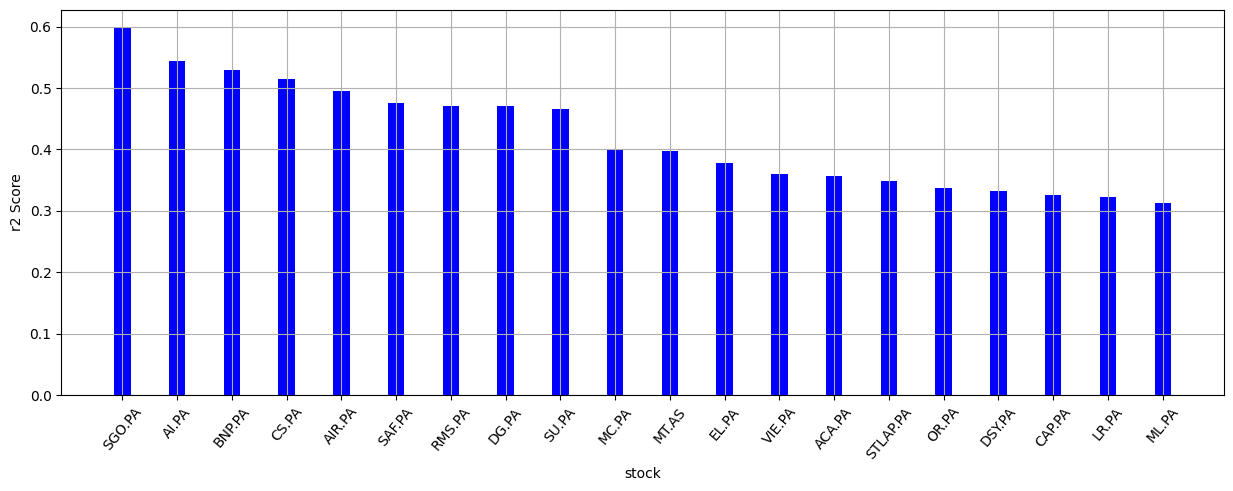

In [ ]:
r2_df = r2_df.sort_values('r2',ascending=False).head(20)
fig, ax1 = plt.subplots(figsize=(15,5))

# Plot close price on left y-axis
ax1.bar(r2_df['stock'], r2_df['r2'], color='b', label='r2 Score', width=0.3)
ax1.set_xlabel("stock")
ax1.set_ylabel("r2 Score", color='black', )
ax1.tick_params(axis='x', labelcolor='black', labelrotation=50C)
ax1.grid(True)